### Käytetään "Oluen tuotantomääriä."-aineistoa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import SimpleExpSmoothing, Holt as holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
#df.rename(columns={'Monthly beer production':'Production'})
df.columns=['Production']
df1 = df.copy()

In [2]:
model = SimpleExpSmoothing(df['Production']).fit()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [3]:
df['Prediction']=model.fittedvalues

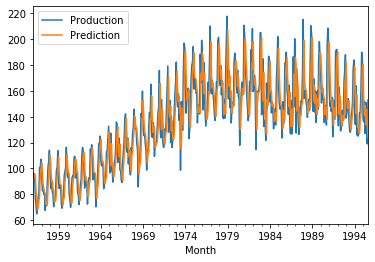

In [4]:
df.plot()

#### Keskihajonta ja niiden erotus

In [5]:
print(df.std())
df['Production'].std() - df['Prediction'].std()

Production    33.738725
Prediction    32.073082
dtype: float64


1.6656428461686374

In [6]:
sqrt(mean_squared_error(df['Production'],df['Prediction']))

18.88836200699367

In [7]:
mean_absolute_error(df['Production'],df['Prediction'])

14.934240842075576

In [8]:
df['Residual']=model.resid

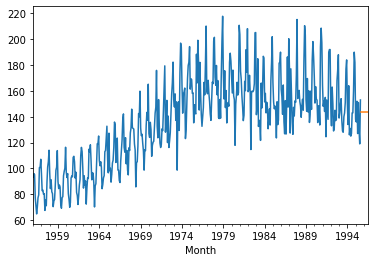

In [9]:
index = pd.date_range('1995-08-01',periods=12,freq='MS')
dfc = pd.DataFrame(model.forecast(12),index=index).astype('float')
dfc.columns=['Predict']
df['Production'].plot()
dfc['Predict'].plot()

In [10]:
model.summary()

Dep. Variable:,endog,No. Observations:,476
Model:,SimpleExpSmoothing,SSE,169822.624
Optimized:,True,AIC,2801.496
Trend:,None,BIC,2809.827
Seasonal:,None,AICC,2801.581
Seasonal Periods:,None,Date:,"Thu, 05 Dec 2019"
Box-Cox:,False,Time:,12:58:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6777153,alpha,True
initial_level,93.203435,l.0,True


#### Kokeillaan saadaanko parempaa mallia

In [11]:
model1= holt(df1['Production']).fit()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [12]:
df1['Prediction']= model1.fittedvalues


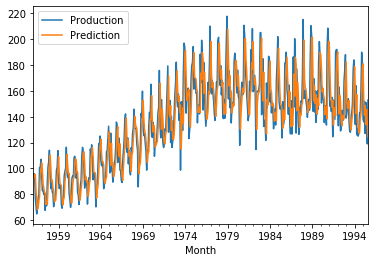

In [13]:
df1.plot()

In [14]:
sqrt(mean_squared_error(df1['Production'],df1['Prediction']))

18.887712861850254

In [15]:
mean_absolute_error(df1['Production'],df1['Prediction'])

14.93299324234826

In [16]:
df1['Residual']=model1.resid

In [17]:
df['Residual'].mean()

0.15654480911534077

In [18]:
df1['Residual'].mean()

1.3058880238921401e-05

## Verrataan molempien mallien keskimääräisiä virheitä Production vs Prediction 

In [21]:
sqrt(mean_squared_error(df1['Production'],df1['Prediction'])) - sqrt(mean_squared_error(df['Production'],df['Prediction']))

-0.0006491451434165185

In [22]:
mean_absolute_error(df1['Production'],df1['Prediction']) - mean_absolute_error(df['Production'],df['Prediction'])

-0.0012475997273160289

### Erot ovat niin pienet ettei ole väliä kumpaa mallia käyttää

In [61]:
index = pd.date_range('1995-09-01',periods=334,freq='MS')
Ennustedf1 = pd.DataFrame(model1.forecast(334),index=index).astype('float')

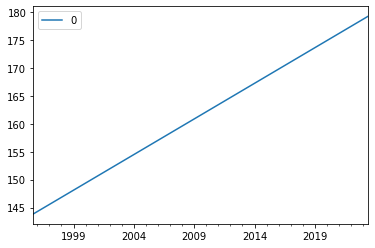

In [62]:
Ennustedf1.plot()

In [64]:
Ennustedf1.loc['2019-12-01']

0    174.774087
Name: 2019-12-01 00:00:00, dtype: float64

### Ennusteen mukaan Joulukuun alussa vuonna 2019, Oluen tuotantomäärä olisi 174.77
###### Huom. ennuste on suora sillä analyysissä käytettiin lineaarisen regression mallia


In [66]:
model1.summary()

Dep. Variable:,endog,No. Observations:,476
Model:,Holt,SSE,169810.952
Optimized:,True,AIC,2805.463
Trend:,Additive,BIC,2822.125
Seasonal:,None,AICC,2805.642
Seasonal Periods:,None,Date:,"Thu, 12 Dec 2019"
Box-Cox:,False,Time:,14:42:51
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6776196,alpha,True
smoothing_slope,0.000000,beta,True
